# What part of the race determines success?
#### * This analysis uses data only from the finals round of competition. *

## Read and Clean Data

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
sns.set_theme(style='ticks')

# Separating and Reading Data

xlsx = pd.ExcelFile('Track_Project.xlsx')
df_warholm_s = pd.read_excel(xlsx, sheet_name='W_Splits')
df_benjamin_s = pd.read_excel(xlsx, sheet_name='B_Splits')
df_dossantos_s = pd.read_excel(xlsx, sheet_name='DS_Splits')
df_warholm_c = pd.read_excel(xlsx, sheet_name='W_Cumulative')
df_benjamin_c = pd.read_excel(xlsx, sheet_name='B_Cumulative')
df_dossantos_c = pd.read_excel(xlsx, sheet_name='DS_Cumulative')

df_w_splits = df_warholm_s.copy().assign(Athlete='Warholm')
df_b_splits = df_benjamin_s.copy().assign(Athlete='Benjamin')
df_ds_splits = df_dossantos_s.copy().assign(Athlete='dos Santos')
df_splits = pd.concat([df_w_splits,df_b_splits,df_ds_splits],axis=0)
df_splits = df_splits.sort_values(by='Time')

# Setting Up 

athlete_order = ['Warholm','Benjamin','dos Santos']

all_columns = ['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','Run in']
start_phase_columns = ['H1','H2','H3','H4']
mid_phase_columns = ['H5','H6','H7']
end_phase_columns = ['H8','H9','H10','Run in']
df_splits['Start_Phase'] = df_splits[start_phase_columns].mean(axis=1)
df_splits['Mid_Phase'] = df_splits[mid_phase_columns].mean(axis=1)
df_splits['End_Phase'] = df_splits[end_phase_columns].mean(axis=1)
df_splits_finals = df_splits[(df_splits['Type']=='final')]
df_splits_finals.to_csv('df_splits_finals.csv',index=False)

## Total Time Correlation for Each Split

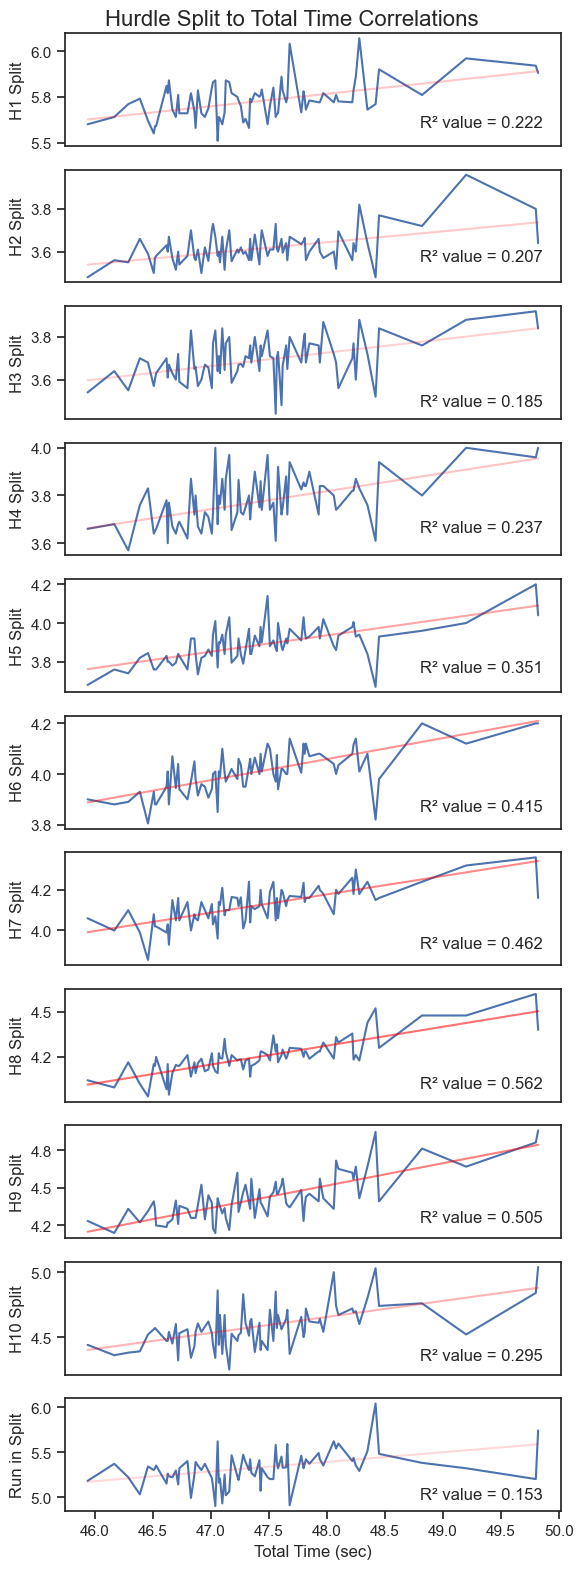

In [3]:
fig, ax = plt.subplots(11,figsize=(6,16))
r_squared_values = {}
for i, column in enumerate(all_columns):
    sns.lineplot(data=df_splits_finals,x='Time',y=column, errorbar=None, ax=ax[i])
    x=df_splits_finals['Time']
    y=df_splits_finals[column]
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    r_squared = r_value**2
    r_squared_values[column] = r_squared
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax[i].text(x=48.8,y=min(y)+0.075,s=f'R² value = {r_squared:.3f}')
    ax[i].set_ylabel(f'{column} Split')
    x_range = np.linspace(x.min(), x.max(), 100)
    y_pred = slope * x_range + intercept
    ax[i].plot(x_range, y_pred, color='red', label='Regression',alpha=r_squared)
    if i != len(all_columns)-1:
        ax[i].set_xticks([])
        ax[i].set_xlabel('')
    else:
        ax[i].set_xlabel('Total Time (sec)')
plt.suptitle("Hurdle Split to Total Time Correlations",fontsize=16)
fig.tight_layout()
plt.show()

## R Squared Values Summary

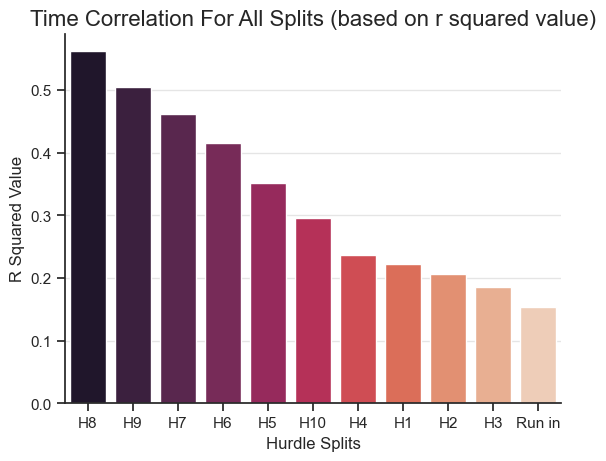

In [4]:
r_squared_sorted = dict(sorted(r_squared_values.items(),key = lambda item: item[1], reverse=True))
sns.barplot(x=list(r_squared_sorted.keys()),y=list(r_squared_sorted.values()),hue=list(r_squared_sorted.keys()),palette='rocket')
sns.despine()
plt.xlabel('Hurdle Splits')
plt.ylabel('R Squared Value')
plt.title('Time Correlation For All Splits (based on r squared value)',fontsize=16)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

# We can see that Hurdle 8, arguably the most crucial, is the one that most correlates with total time (R squared = 0.562). 
# This shows that Hurdle 8 is likely the best test of the athlete's capabilities and strength.
# Hurdles 6, 7, and 9 (R squared values of 0.415, 0.462, and 0.505) are next correlation wise, showing that the back half of the race determines your time. 
# Hurdles 1, 2 and 3 (R squared values of 0.222, 0.207, and 0.185) correlate the least so it is not over in the beginning (in addition to the Run in, which is really interesting)

### Prep for Power BI Graphs - Sorting Data by Athlete

In [9]:
r_squared_powerbi = []
for athlete in athlete_order:
    df_athlete = df_splits_finals[df_splits_finals['Athlete']==athlete]
    for split in all_columns:
        x = df_athlete['Time']
        y = df_athlete[split]
        slope, intercept, r_value, _, _ = linregress(x,y)
        r_squared_powerbi.append(
            {
                'Athlete': athlete,
                'Split':split,
                'R2 Value': r_value**2
            }
        )
df_r_squared_powerbi = pd.DataFrame(r_squared_powerbi)
df_r_squared_powerbi.to_csv('r_squared.csv',index=False)